In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
import json

In [2]:
Charge_hourly = pd.read_csv(r'./charge_hourly.csv')

In [3]:
Charge_hourly

,Time,Energy_kWh,weekday,hour,hols
0,2020-12-02 09:00:00,4.214567,2,9,NaN
1,2020-12-02 10:00:00,0.560625,2,10,NaN
2,2020-12-02 11:00:00,-0.011950,2,11,NaN
3,2020-12-02 12:00:00,-0.005675,2,12,NaN
4,2020-12-02 13:00:00,0.000558,2,13,NaN
...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,20,Spring holiday
10884,2022-02-28 21:00:00,0.000000,0,21,Spring holiday
10885,2022-02-28 22:00:00,0.000000,0,22,Spring holiday
10886,2022-02-28 23:00:00,0.000000,0,23,Spring holiday


In [4]:
Charge_hourly.loc[Charge_hourly.Energy_kWh < 0,'Energy_kWh'] = 0

In [5]:
Charge_hourly['Time'] = pd.to_datetime(Charge_hourly['Time'])

In [6]:
Charge_hourly['is_hol'] = ~Charge_hourly.isna()['hols']

In [7]:
Charge_hourly.set_index(['Time'], inplace=True)

In [8]:
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol
Time,,,,,
2020-12-02 09:00:00,4.214567,2,9,NaN,False
2020-12-02 10:00:00,0.560625,2,10,NaN,False
2020-12-02 11:00:00,0.000000,2,11,NaN,False
2020-12-02 12:00:00,0.000000,2,12,NaN,False
2020-12-02 13:00:00,0.000558,2,13,NaN,False
...,...,...,...,...,...
2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True
2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True
2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True


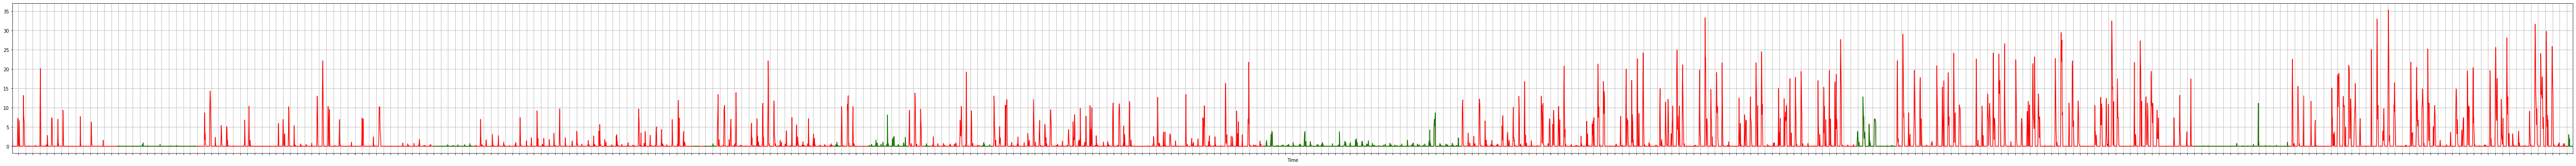

In [9]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

R_value = pd.read_json(r'./Rvalue.json', orient='split')

R_value

R_value.loc[R_value.Rt_avg.isna(), 'Rt_avg'] = (R_value.loc[R_value.Rt_avg.isna(), 'Rt_low'] + R_value.loc[R_value.Rt_avg.isna(), 'Rt_up'])/2

R_value.set_index(['Date'], inplace=True)

Charge_hourly['R'] = np.NaN
for i in range(len(Charge_hourly)):
    Charge_hourly.loc[str(Charge_hourly.index.date[i]), 'R'] = R_value.loc[str(Charge_hourly.index.date[i]),'Rt_avg']

Charge_hourly

fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = (10*Charge_hourly['R']).plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

ic = pd.read_csv(r'./COVID-19_ic_opnames.csv', sep=';')

ic

ic['Date_of_statistics'] = pd.to_datetime(ic['Date_of_statistics'])

ic.set_index(['Date_of_statistics'], inplace=True)

Charge_hourly['IC_number'] = np.NaN
for i in range(len(Charge_hourly)):
    Charge_hourly.loc[str(Charge_hourly.index.date[i]), 'IC_number'] = ic.loc[str(Charge_hourly.index.date[i]),'IC_admission']

Charge_hourly

fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = Charge_hourly['IC_number'].plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

# Covid measures in the Netherlands
Source:

https://www.simmons-simmons.com/en/publications/ckk2f4e4e17ch0933ifsradrd/covid-19-netherlands-lockdown-measures-extended

https://www.government.nl/latest/news/2021/03/23/coronavirus-measures-will-be-extended

https://www.government.nl/latest/news/2021/04/20/step-1-shops-and-outdoor-seating-at-restaurants-and-cafes-will-partially-reopen-evening-curfew-lifted

https://www.government.nl/latest/news/2021/05/11/step-2-indoor-sports-facilities-to-reopen-and-more-scope-for-activities-outdoors

https://www.government.nl/latest/news/2021/05/28/step-3-nearly-everything-to-reopen-subject-to-certain-conditions
## 19 November to 28 April
Hard lockdown: only 2 guests max, all gyms, offline classes were closed. Only super markets, pharmacies were opened.
## 21 January
New UK varient, curfew from 20:30 to 04:30 was introduced.
## 28 April
Curfew was lifted. In-person classes once a week
## 19 May
Leisure and sport activities were allowed
## 05 June
Increase max number of people in a room. Internal teams of company were allowed to meet again.
## 21 June
Employee can work up to half of their hours in the office. Events were allowed.
## 15 July
Work at home unless there is no other way.
## 30 August
On-site learning at univesities was permitted.
## 28 November to 25 January
Schools were still opened. No social activities after 17:00. Shops closed after 20:00
## 20 December to 14 January
School acrtivities remained like before, cinemas, theaters, museums were closed
## 15 January
Educational activities go back to normal

Column "measure" describe how strict the measures were. The complete lockdown has the value 1, partly open of schools has the value 0.75, open of school with strict measures (early close of shops, social activities,...) has the value of 0.5, and open of school with relaxed measures has the value of 0.25.

Distribution of values:

19/11/2020 to 27/04/2021: value 3

28/04/2021 to 04/06/2021: value 2

05/06/2021 to 14/07/2021: value 1

15/07/2021 to 30/08/2021: value 2

01/09/2021 to 15/01/2022: value 1

after 15/01/2022: value 0

In [10]:
Charge_hourly['measure'] = np.NaN
Charge_hourly.loc[Charge_hourly.index < '2021-04-28', 'measure'] = 3
Charge_hourly.loc[(Charge_hourly.index < '2021-06-05') & (Charge_hourly.index > '2021-04-27'),'measure'] = 2
Charge_hourly.loc[(Charge_hourly.index < '2021-07-15') & (Charge_hourly.index > '2021-06-04'),'measure'] = 1
Charge_hourly.loc[(Charge_hourly.index < '2021-09-01') & (Charge_hourly.index > '2021-07-14'),'measure'] = 2
Charge_hourly.loc[(Charge_hourly.index < '2022-01-16') & (Charge_hourly.index > '2021-08-31'),'measure'] = 1
Charge_hourly.loc[(Charge_hourly.index > '2022-01-15'),'measure'] = 0

In [11]:
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol,measure
Time,,,,,,
2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0
2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0
2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0
2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0
2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0
...,...,...,...,...,...,...
2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0
2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0
2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0


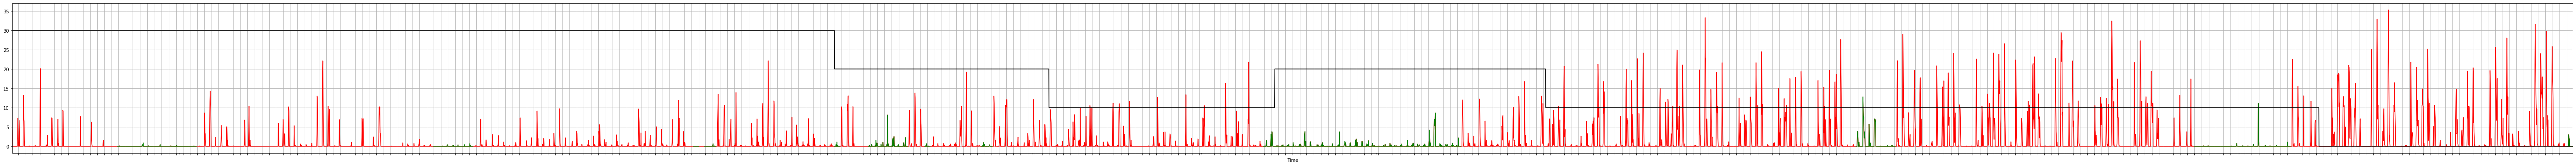

In [12]:
fig1 = Charge_hourly['Energy_kWh'].plot(figsize=(100,6), color='r')
fig1.xaxis.set_major_locator(plt.dates.MonthLocator())

fig2 = Charge_hourly.where(Charge_hourly.is_hol, np.NaN)['Energy_kWh'].plot(figsize=(100,6), color='g')
fig2.xaxis.set_major_locator(plt.dates.MonthLocator())

fig3 = (10*Charge_hourly['measure']).plot(figsize=(100,6), color='k')
fig3.xaxis.set_major_locator(plt.dates.MonthLocator())

plt.pyplot.grid()
plt.pylab.show()

In [27]:
#from sklearn import preprocessing

#x = Charge_hourly[['Energy_kWh']].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#Charge_hourly.loc[:,'Energy_kWh'] = x_scaled

#Charge_hourly

In [13]:
Charge_hourly['E_1'] = Charge_hourly['Energy_kWh']
Charge_hourly['E_2'] = Charge_hourly['Energy_kWh']
Charge_hourly['E_3'] = Charge_hourly['Energy_kWh']
Charge_hourly['E_1'] = Charge_hourly.E_1.shift(1)
Charge_hourly['E_2'] = Charge_hourly.E_2.shift(2)
Charge_hourly['E_3'] = Charge_hourly.E_3.shift(3)
Charge_hourly

,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
Time,,,,,,,,,
2020-12-02 09:00:00,4.214567,2,9,NaN,False,3.0,NaN,NaN,NaN
2020-12-02 10:00:00,0.560625,2,10,NaN,False,3.0,4.214567,NaN,NaN
2020-12-02 11:00:00,0.000000,2,11,NaN,False,3.0,0.560625,4.214567,NaN
2020-12-02 12:00:00,0.000000,2,12,NaN,False,3.0,0.000000,0.560625,4.214567
2020-12-02 13:00:00,0.000558,2,13,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...
2022-02-28 20:00:00,0.000000,0,20,Spring holiday,True,0.0,0.000000,0.000000,0.000925
2022-02-28 21:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000000
2022-02-28 22:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000


In [14]:
#Charge_hourly.to_csv('./charge_hourly_with_Covid.csv')

In [15]:
Charge_hourly.index

DatetimeIndex(['2020-12-02 09:00:00', '2020-12-02 10:00:00',
               '2020-12-02 11:00:00', '2020-12-02 12:00:00',
               '2020-12-02 13:00:00', '2020-12-02 14:00:00',
               '2020-12-02 15:00:00', '2020-12-02 16:00:00',
               '2020-12-02 17:00:00', '2020-12-02 18:00:00',
               ...
               '2022-02-28 15:00:00', '2022-02-28 16:00:00',
               '2022-02-28 17:00:00', '2022-02-28 18:00:00',
               '2022-02-28 19:00:00', '2022-02-28 20:00:00',
               '2022-02-28 21:00:00', '2022-02-28 22:00:00',
               '2022-02-28 23:00:00', '2022-03-01 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=10888, freq=None)

In [16]:
Charge_hourly = Charge_hourly.iloc[3:,:]

In [18]:
X = Charge_hourly.iloc[:,[6,7,8]].values
y = Charge_hourly.iloc[:, 0].values

In [19]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [20]:
X_poly.shape

(10885, 56)

In [21]:
X.shape

(10885, 3)

In [22]:
Charge_hourly.index

DatetimeIndex(['2020-12-02 12:00:00', '2020-12-02 13:00:00',
               '2020-12-02 14:00:00', '2020-12-02 15:00:00',
               '2020-12-02 16:00:00', '2020-12-02 17:00:00',
               '2020-12-02 18:00:00', '2020-12-02 19:00:00',
               '2020-12-02 20:00:00', '2020-12-02 21:00:00',
               ...
               '2022-02-28 15:00:00', '2022-02-28 16:00:00',
               '2022-02-28 17:00:00', '2022-02-28 18:00:00',
               '2022-02-28 19:00:00', '2022-02-28 20:00:00',
               '2022-02-28 21:00:00', '2022-02-28 22:00:00',
               '2022-02-28 23:00:00', '2022-03-01 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=10885, freq=None)

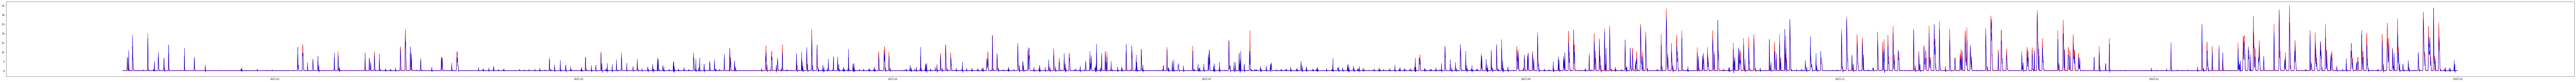

In [23]:
plt.pyplot.figure(figsize=(200,6))
plt.pyplot.plot(Charge_hourly.index,y,'r',Charge_hourly.index,pol_reg.predict(X_poly),'b')
plt.pyplot.show()

# Validate

In [42]:
Grid0422 = pd.read_csv(r'../../Data_HAN/Data_csv/Grid_040122.csv')
PV0422 = pd.read_csv(r'../../Data_HAN/Data_csv/PV_040122.csv')

In [43]:
def removeLargeDiff(diff_in):
    if (diff_in > 600):
        return 0
    return diff_in

def extract_data(data_in):
    data_out = data_in.drop(['No', 'I1', 'I2', 'I3', 'V1', 'V2', 'V3', 'Q1', 'Q2', 'Q3', 'S1', 'S2', 'S3', 'PF1', 'PF2', 'PF3', 'F'], axis=1)
    data_out['Power'] = data_out['P1'] + data_out['P2'] + data_out['P3']
    
    data_out['Timediff'] = data_out.diff()['Time']
    data_out.loc[:,'Timediff'] = data_out.Timediff.shift(-1)
    data_out = data_out.iloc[:-1,:]
    data_out['Timediff'] = data_out.Timediff.map(removeLargeDiff)
    
    data_out['Energy'] = data_out['Power'] * data_out['Timediff']
    data_out.loc[:,'Time'] = pd.to_datetime(data_out.loc[:,'Time'],unit='s')
    df = data_out.set_index(['Time'])
    data = df[['Energy']].groupby(pd.Grouper(freq='1H')).sum()
    data['Energy_kWh'] = data['Energy'] / 3600000
    return data
    #return data_out.set_index(['Time'])

In [44]:
Grid0422_hourly = extract_data(Grid0422)
PV0422_hourly = extract_data(PV0422)

In [45]:
Grid0422_hourly

,Energy,Energy_kWh
Time,,
2022-03-01 01:00:00,0.0,0.000000
2022-03-01 02:00:00,0.0,0.000000
2022-03-01 03:00:00,0.0,0.000000
2022-03-01 04:00:00,0.0,0.000000
2022-03-01 05:00:00,0.0,0.000000
...,...,...
2022-03-28 03:00:00,0.0,0.000000
2022-03-28 04:00:00,0.0,0.000000
2022-03-28 05:00:00,1038240.0,0.288400


In [46]:
PV0422_hourly

,Energy,Energy_kWh
Time,,
2022-03-01 01:00:00,0.0,0.000000
2022-03-01 02:00:00,0.0,0.000000
2022-03-01 03:00:00,0.0,0.000000
2022-03-01 04:00:00,0.0,0.000000
2022-03-01 05:00:00,0.0,0.000000
...,...,...
2022-03-28 03:00:00,0.0,0.000000
2022-03-28 04:00:00,0.0,0.000000
2022-03-28 05:00:00,948180.0,0.263383


In [47]:
Charge0422_hourly = Grid0422_hourly[['Energy_kWh']].copy()
Charge0422_hourly['Energy_kWh'] = PV0422_hourly['Energy_kWh'] - Grid0422_hourly['Energy_kWh']

In [48]:
Charge0422_hourly.loc[Charge0422_hourly.Energy_kWh < 0, 'Energy_kWh'] = 0
Charge0422_hourly['weekday']=Charge0422_hourly.index.day_of_week
Charge0422_hourly['hour']=Charge0422_hourly.index.hour

In [49]:
Charge0422_hourly

,Energy_kWh,weekday,hour
Time,,,
2022-03-01 01:00:00,0.000000,1,1
2022-03-01 02:00:00,0.000000,1,2
2022-03-01 03:00:00,0.000000,1,3
2022-03-01 04:00:00,0.000000,1,4
2022-03-01 05:00:00,0.000000,1,5
...,...,...,...
2022-03-28 03:00:00,0.000000,0,3
2022-03-28 04:00:00,0.000000,0,4
2022-03-28 05:00:00,0.000000,0,5


In [50]:
Charge0422_hourly['hols'] = np.NaN
Charge0422_hourly.loc[(Charge0422_hourly.index > '2022-02-27 23:00:00') & (Charge0422_hourly.index < '2022-03-07 00:00:00'), 'hols'] = 'Spring holiday'

In [51]:
Charge0422_hourly['is_hol'] = ~Charge0422_hourly.isna()['hols']

In [52]:
Charge0422_hourly

,Energy_kWh,weekday,hour,hols,is_hol
Time,,,,,
2022-03-01 01:00:00,0.000000,1,1,Spring holiday,True
2022-03-01 02:00:00,0.000000,1,2,Spring holiday,True
2022-03-01 03:00:00,0.000000,1,3,Spring holiday,True
2022-03-01 04:00:00,0.000000,1,4,Spring holiday,True
2022-03-01 05:00:00,0.000000,1,5,Spring holiday,True
...,...,...,...,...,...
2022-03-28 03:00:00,0.000000,0,3,NaN,False
2022-03-28 04:00:00,0.000000,0,4,NaN,False
2022-03-28 05:00:00,0.000000,0,5,NaN,False


Charge0422_hourly['R'] = np.NaN
for i in range(len(Charge0422_hourly)):
    Charge0422_hourly.loc[str(Charge0422_hourly.index.date[i]), 'R'] = R_value.loc[str(Charge0422_hourly.index.date[i]),'Rt_avg']
    
Charge0422_hourly['IC_number'] = np.NaN
for i in range(len(Charge0422_hourly)):
    Charge0422_hourly.loc[str(Charge0422_hourly.index.date[i]), 'IC_number'] = ic.loc[str(Charge0422_hourly.index.date[i]),'IC_admission']
    
Charge0422_hourly['measure'] = 0.25

In [53]:
Charge0422_hourly['measure'] = 0

In [54]:
Charge0422_hourly

,Energy_kWh,weekday,hour,hols,is_hol,measure
Time,,,,,,
2022-03-01 01:00:00,0.000000,1,1,Spring holiday,True,0
2022-03-01 02:00:00,0.000000,1,2,Spring holiday,True,0
2022-03-01 03:00:00,0.000000,1,3,Spring holiday,True,0
2022-03-01 04:00:00,0.000000,1,4,Spring holiday,True,0
2022-03-01 05:00:00,0.000000,1,5,Spring holiday,True,0
...,...,...,...,...,...,...
2022-03-28 03:00:00,0.000000,0,3,NaN,False,0
2022-03-28 04:00:00,0.000000,0,4,NaN,False,0
2022-03-28 05:00:00,0.000000,0,5,NaN,False,0


In [55]:
#from sklearn import preprocessing

#x = Charge0322_hourly[['Energy_kWh']].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#Charge0322_hourly.loc[:,'Energy_kWh'] = x_scaled

#Charge0322_hourly

In [56]:
Charge0422_hourly.loc[:,'E_1'] = Charge0422_hourly['Energy_kWh']
Charge0422_hourly.loc[:,'E_2'] = Charge0422_hourly['Energy_kWh']
Charge0422_hourly.loc[:,'E_3'] = Charge0422_hourly['Energy_kWh']
Charge0422_hourly.loc[:,'E_1'] = Charge0422_hourly.E_1.shift(1)
Charge0422_hourly.loc[:,'E_2'] = Charge0422_hourly.E_2.shift(2)
Charge0422_hourly.loc[:,'E_3'] = Charge0422_hourly.E_3.shift(3)
Charge0422_hourly = Charge0422_hourly.iloc[3:,:]
Charge0422_hourly

,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
Time,,,,,,,,,
2022-03-01 04:00:00,0.000000,1,4,Spring holiday,True,0,0.000000,0.000000,0.0
2022-03-01 05:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0
2022-03-01 06:00:00,0.044108,1,6,Spring holiday,True,0,0.000000,0.000000,0.0
2022-03-01 07:00:00,7.013325,1,7,Spring holiday,True,0,0.044108,0.000000,0.0
2022-03-01 08:00:00,7.089000,1,8,Spring holiday,True,0,7.013325,0.044108,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-28 03:00:00,0.000000,0,3,NaN,False,0,0.000000,0.000000,0.0
2022-03-28 04:00:00,0.000000,0,4,NaN,False,0,0.000000,0.000000,0.0
2022-03-28 05:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0


In [57]:
Charge0422_hourly.to_csv('./charge0422_hourly_with_Covid_new.csv')

In [58]:
X_val = Charge0422_hourly.iloc[:,[6,7,8]].values
y_val = Charge0422_hourly.iloc[:, 0].values

In [59]:
X_val_poly = poly.fit_transform(X_val)

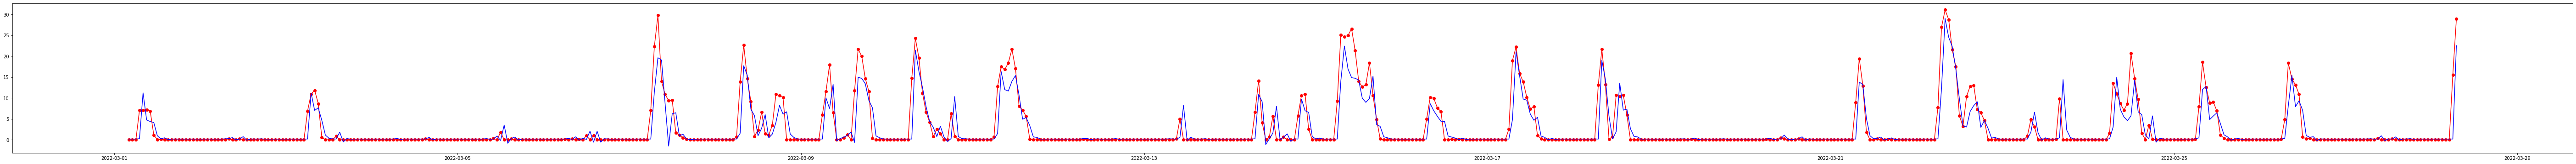

In [60]:
plt.pyplot.figure(figsize=(100,6))
plt.pyplot.plot(Charge0422_hourly.index,y_val,'r', marker='o')
plt.pyplot.plot(Charge0422_hourly.index,pol_reg.predict(X_val_poly),'b')
plt.pyplot.show()

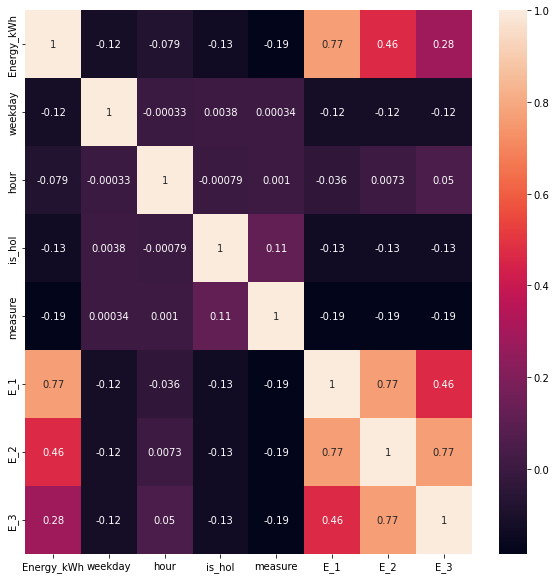

In [61]:
import seaborn as sn

fig, ax = plt.pyplot.subplots(figsize=(10,10))
corrMatrix = Charge_hourly.corr()
sn.heatmap(corrMatrix, annot=True, ax=ax)
plt.pyplot.show()